# Load packages

In [1]:
%matplotlib inline 
from wmf import wmf
import pandas as pd 
import numpy as np 
import pylab as pl 
import cartopy.crs as ccrs
from matplotlib import gridspec as gr

No se logra importar deap tools, por lo tanto se deshabilita SimuBasin.Calib_NSGAII


# Load rasters and obtains the watershed

In [2]:
#Loads the DEM and DIR raster maps
DEM, epsg = wmf.read_map_raster('dem.tif', isDEMorDIR=True, dxp = 93.78, noDataP = -9999)
DIR, epsg = wmf.read_map_raster('dir.tif', isDEMorDIR=True, dxp = 93.78, isDIR=True, noDataP = -9999)

In [3]:
#Obtains an streamflow and the watershed.
St = wmf.Stream(-95.164,41.718, DEM, DIR)
cu = wmf.SimuBasin(-95.633,40.645, DEM, DIR, stream=St)

1


In [4]:
#Saves a shapefile with the network of the watershed
cu.Save_Net2Map('temp_net.shp')

# Get Geomorphological features

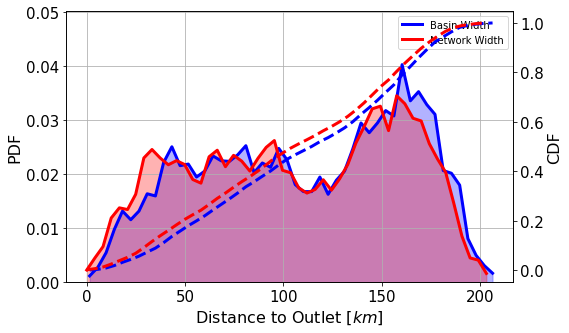

In [5]:
#Compute several geomorphological features.
cu.GetGeo_Cell_Basics()
cu.GetGeo_HAND_and_rDUNE()
cu.GetGeo_IT()
cu.GetGeo_Parameters()
cu.GetGeo_WidthFunction()
cu.GetGeo_Ppal_Hipsometric()
IT = cu.GetGeo_IT()
cu.GetGeo_StreamOrder()
#Get the steepnes by hillslope
sh = cu.Transform_Basin2Hills(cu.CellSlope)
sh = cu.Transform_Hills2Basin(sh)

# Plots of the obtained results.

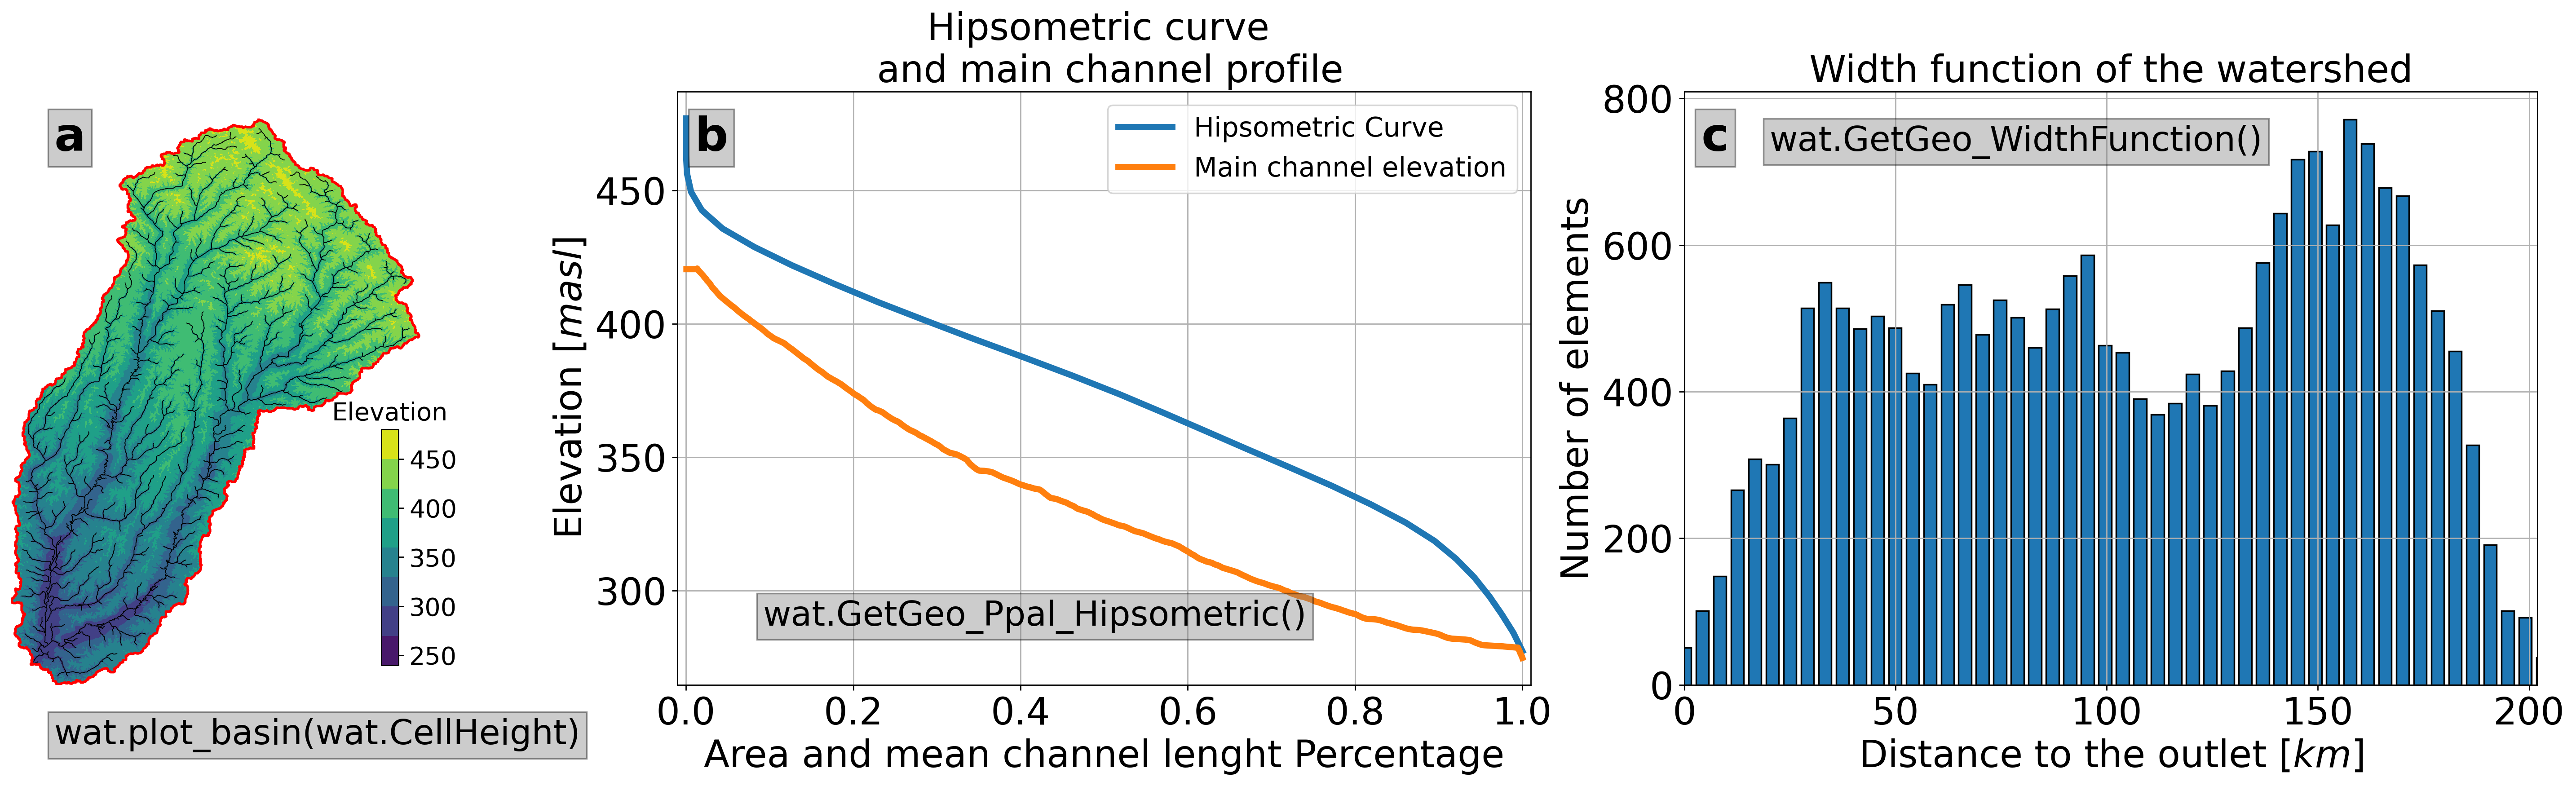

In [6]:
fig = pl.figure(figsize=(30,7), dpi = 250)
specs = gr.GridSpec(nrows=1, ncols=3, width_ratios=[0.35 ,0.5, 0.5], wspace=0.2)

proj = ccrs.PlateCarree()
ax = fig.add_subplot(specs[0], projection = proj)
ax1 = cu.plot_basin(cu.CellHeight, ax = ax, fig = fig, shape_color='k',
                    cbar_loc=[0.26,0.15,0.005,0.3],cbar_orientation='vertical', 
                    cbar_ticks=[250,300,350,400,450],cbar_title='Elevation',
                    shape_path='temp_net.shp')
ax.text(0.1,0.9, 'a', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
            bbox=dict(facecolor='gray', alpha=0.4))
ax.text(0.1,-0.1,'wat.plot_basin(wat.CellHeight)',fontdict = {'size': 22}, transform = ax.transAxes,
        bbox=dict(facecolor='gray', alpha=0.4))

ax = fig.add_subplot(specs[1])
pl.plot(cu.hipso_basin[0]/cu.hipso_basin[0].max(), cu.hipso_basin[1], lw = 4, label = 'Hipsometric Curve')
pl.plot(cu.ppal_stream[1]/cu.ppal_stream[1].max(), cu.ppal_stream[0], lw = 4, label = 'Main channel elevation')
ax.tick_params(labelsize = 24)
ax.grid()
ax.set_xlabel('Area and mean channel lenght Percentage', size = 24)
ax.set_ylabel('Elevation [$masl$]', size = 24)
ax.text(0.02,0.9, 'b', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
            bbox=dict(facecolor='gray', alpha=0.4))
ax.legend(loc = 0, fontsize = 'xx-large')
ax.set_title('Hipsometric curve \n and main channel profile', size = 24)
ax.set_xlim(-0.01,1.01)
ax.text(0.1,0.1,'wat.GetGeo_Ppal_Hipsometric()',fontdict = {'size': 22}, transform = ax.transAxes,
        bbox=dict(facecolor='gray', alpha=0.4))


ax = fig.add_subplot(specs[2])
pl.bar(cu.width_distances, cu.width_hits, width=3,edgecolor = 'k')
#pl.plot(cu.ppal_stream[1]/cu.ppal_stream[1].max(), cu.ppal_stream[0], lw = 4, label = 'Main channel elevation')
ax.tick_params(labelsize = 24)
ax.grid()
ax.set_title('Width function of the watershed', size = 24)
ax.set_xlabel('Distance to the outlet [$km$]', size = 24)
ax.set_ylabel('Number of elements', size = 24)
ax.text(0.02,0.9, 'c', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
            bbox=dict(facecolor='gray', alpha=0.4))
ax.set_xlim(0,202)
ax.text(0.1,0.9,'wat.GetGeo_WidthFunction()',fontdict = {'size': 22}, transform = ax.transAxes,
        bbox=dict(facecolor='gray', alpha=0.4))

pl.savefig('Geomorphology_example.png', bbox_inches = 'tight')

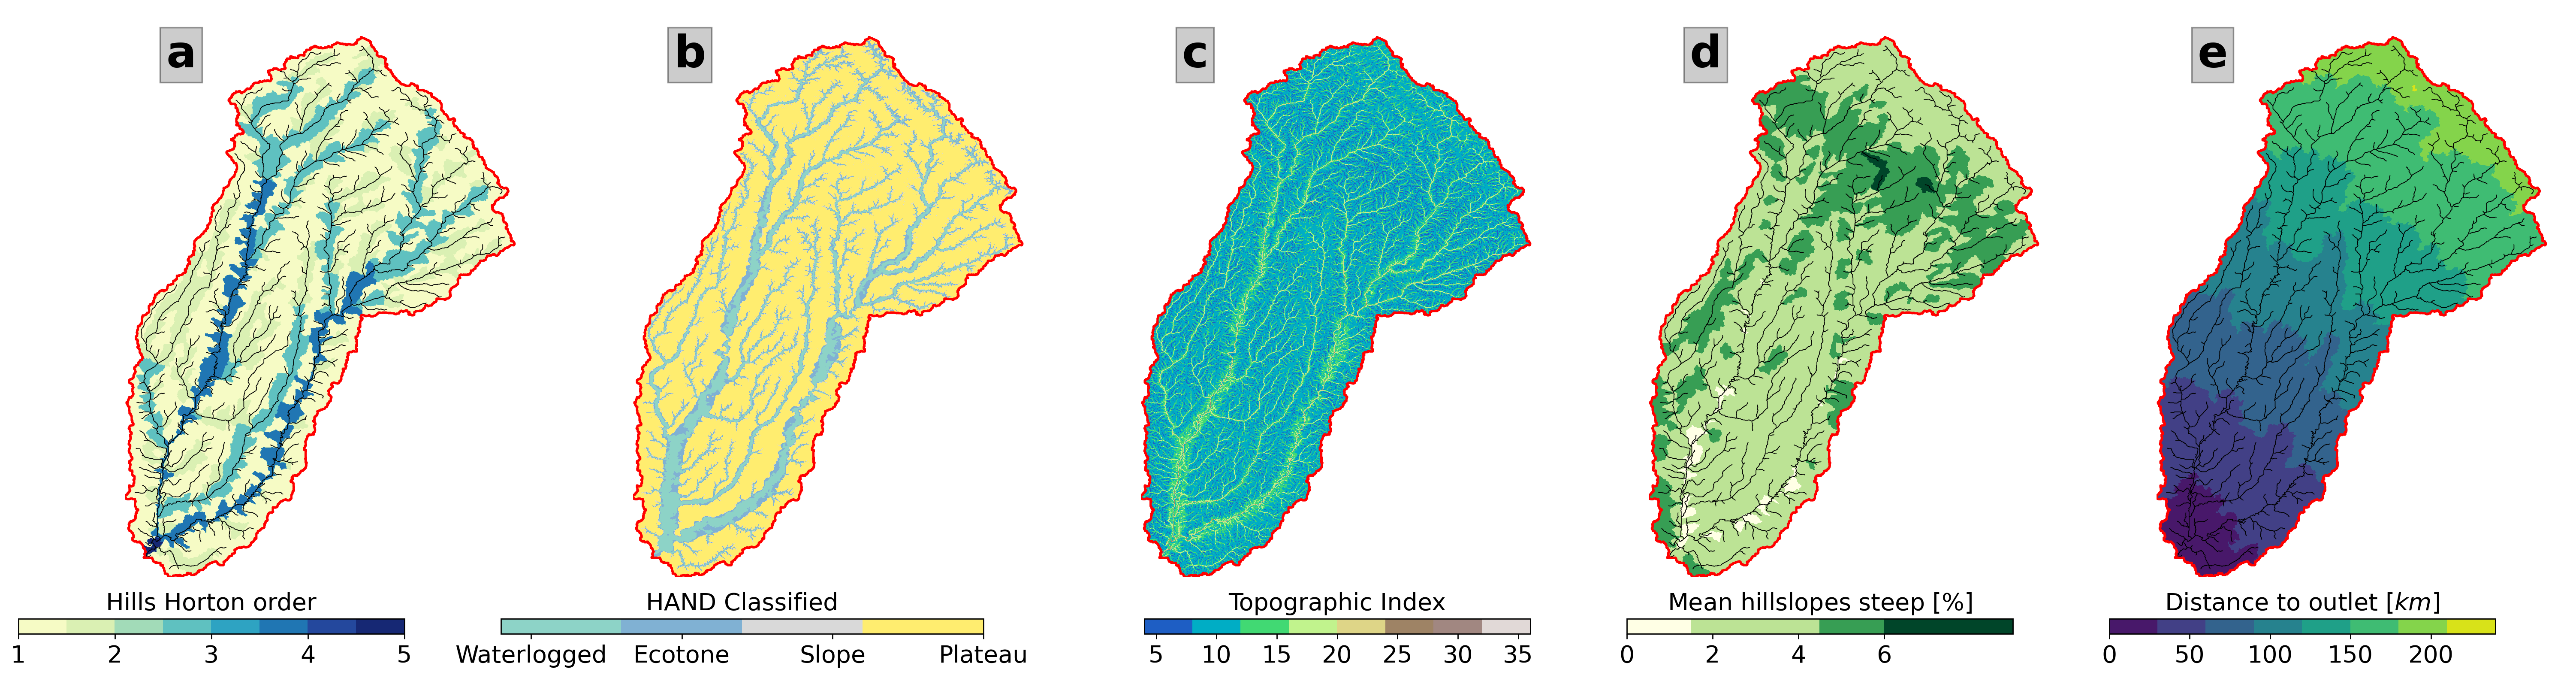

In [8]:
fig = pl.figure(figsize=(30,7), dpi = 250)
specs = gr.GridSpec(nrows=1, ncols=5, wspace=0.1)

proj = ccrs.PlateCarree()
ax = fig.add_subplot(specs[0], projection = proj)
ax1 = cu.plot_basin(cu.CellHorton_Hill,  ax = ax, fig = fig, 
                    cmap=pl.get_cmap('YlGnBu'),
                     cbar_loc=[0.1,0.05,0.12,0.02], 
                    cbar_ticks=[1,2,3,4,5,6],cbar_title='Hills Horton order',
                   shape_path='temp_net.shp', shape_color='k')
ax.text(0.1,0.9, 'a', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
             bbox=dict(facecolor='gray', alpha=0.4))


ax = fig.add_subplot(specs[1], projection = proj)
ax1 = cu.plot_basin(cu.CellHAND_class,  ax = ax, fig = fig, 
                    cmap=pl.get_cmap('Set3',4),
                     cbar_loc=[0.1+0.15,0.05,0.15,0.02], 
                    cbar_ticks=[1,2,3,4],cbar_title='HAND Classified',
                    cbar_ticklabels=['Waterlogged','Ecotone','Slope','Plateau'],)
ax.text(0.1,0.9, 'b', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
             bbox=dict(facecolor='gray', alpha=0.4))

ax = fig.add_subplot(specs[2], projection = proj)
ax1 = cu.plot_basin(IT, ax = ax, fig = fig,
                    cmap = pl.get_cmap('terrain'),
                    cbar_loc=[0.15+0.15*2,0.05,0.12,0.02], 
                    cbar_ticks=[5,10,15,20,25,30,35],cbar_title='Topographic Index',)                    
ax.text(0.1,0.9, 'c', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
            bbox=dict(facecolor='gray', alpha=0.4))

ax = fig.add_subplot(specs[3], projection = proj)
ax1 = cu.plot_basin(sh*100,  ax = ax, fig = fig, 
                    cmap=pl.get_cmap('YlGn',4),
                     cbar_loc=[0.15+0.15*3,0.05,0.12,0.02],
                    cbar_ticks=[0,2,4,6],cbar_title='Mean hillslopes steep [$\%$]',
                   shape_path='temp_net.shp', shape_color='k')
                    #cbar_ticklabels=['Waterlogged','Ecotone','Slope','Plateau'],)
ax.text(0.1,0.9, 'd', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
             bbox=dict(facecolor='gray', alpha=0.4))


ax = fig.add_subplot(specs[4], projection = proj)
ax1 = cu.plot_basin(cu.CellDist2Out/1000, ax = ax, fig = fig, shape_color='k',
                    cbar_loc=[0.15+0.15*4,0.05,0.12,0.02],cbar_orientation='horizontal', 
                    cbar_ticks=[0,50,100,150,200,250],cbar_title='Distance to outlet [$km$]',
                    shape_path='temp_net.shp')
ax.text(0.1,0.9, 'e', fontdict = {'size': 30, 'weight':'bold'}, transform = ax.transAxes,
            bbox=dict(facecolor='gray', alpha=0.4))

pl.savefig('Geomorphological_maps.png', bbox_inches='tight')

In [6]:
0.19*5231

993.89

In [7]:
1e6/(532**2)

3.533269263384024